## In this notebook we will read the data & pre-process the text:


* Data Source: you can get a digital copy of the book and here is a [source through Amazon](https://www.amazon.sa/-/en/Professional-Guide-Diseases-Laura-Willis/dp/1975107721/ref=sr_1_1?crid=2S3MISAMZQHFQ&keywords=Professional+Guide+to+Diseases&qid=1640875957&sprefix=professional+guide+to+diseases%2Caps%2C366&sr=8-1)



In [2]:
# Data read/write
import PyPDF2
import numpy as np
import pandas as pd
import re

# Data Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
# Function to convert from list to str
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

In [6]:
def get_freq_word(TEXT_list):
    """This method get count the frequency of each word in the passed parameter"""
    Vocab_list = ' '.join(TEXT_list)
    temp_dict = Counter(Vocab_list.split()).items()
    freq_df = pd.DataFrame(temp_dict)
    freq_df = freq_df.sort_values(1, ascending = False)
    return freq_df

### The Book contains 21 chapters, and we decided to ues 3 chapters:
***The reason for chosen 3 chapters is doing the experiments and prove the idea***

**Chapter name:**
* Cardiovascular
* Gastrointestinal
* Neural
* Renal

In [8]:
# specify file path 
path = "4chapters.pdf"

# open file and read it through PyPDF2 packages
ff = open(path ,"rb")
pdfReader = PyPDF2.PdfReader(ff)

# print the total pages number
print(len(pdfReader.pages))
total_page = len(pdfReader.pages)

537


In [10]:
list_from_pdf =[]
article = " "

# loop through the pages and assign/save the page content in list and str
for page_num  in range(total_page):
    pageObj = pdfReader.pages[page_num]
    extract = pageObj.extract_text().split("\n")
    article += listToString(extract)
    list_from_pdf.append(extract)



# Fix common split word issues
article = re.sub(r'abdom\s*inal', 'abdominal', article)
article = re.sub(r'pr\s*essure', 'pressure', article)
article = re.sub(r'bow\s*el', 'bowel', article)
article = re.sub(r'vom\s*iting', 'vomiting', article)
article = re.sub(r'f\s*low', 'flow', article)
article = re.sub(r'ove\s*rload', 'overload', article)
article = re.sub(r'pulmonar\s*y', 'pulmonary', article)

print(article[1001:2000])

 which propels blood through the system by continuous rhythmic contractions. Located behind the sternum, the heart is a muscular organ the size of a man’s fist. It has three layers: the endoc ardium—the smooth inner layer; the myocardium—the thick, muscular middle layer that contracts in rhythmic beats; and the epicardium—the thin, serous membrane, or outer surface of the heart.Covering the entire heart is a saclike membrane called the pericardium, which has two layers: a visceral layer that’s in contact with the heart and a parietal, or outer, layer. To prevent irritation when the heart moves against this layer during contraction, fluid lubricates the parietal pericardium. The heart has four chambers: two thin-walled chambers called atria and two thick-walled chambers called ventricles. The atria serve as reservoirs during ventricular contraction (systole) and as boos ter pumps during ventricular relaxation (diastole). The left ventricle propels blood through the systemic circulation


In [12]:
# save the book content in dataframe
df = pd.DataFrame([article], columns=['string_values'])
df.head()


,string_values
0,1 Cardiovascular Disorders Introduction The c...


### Data Visualize

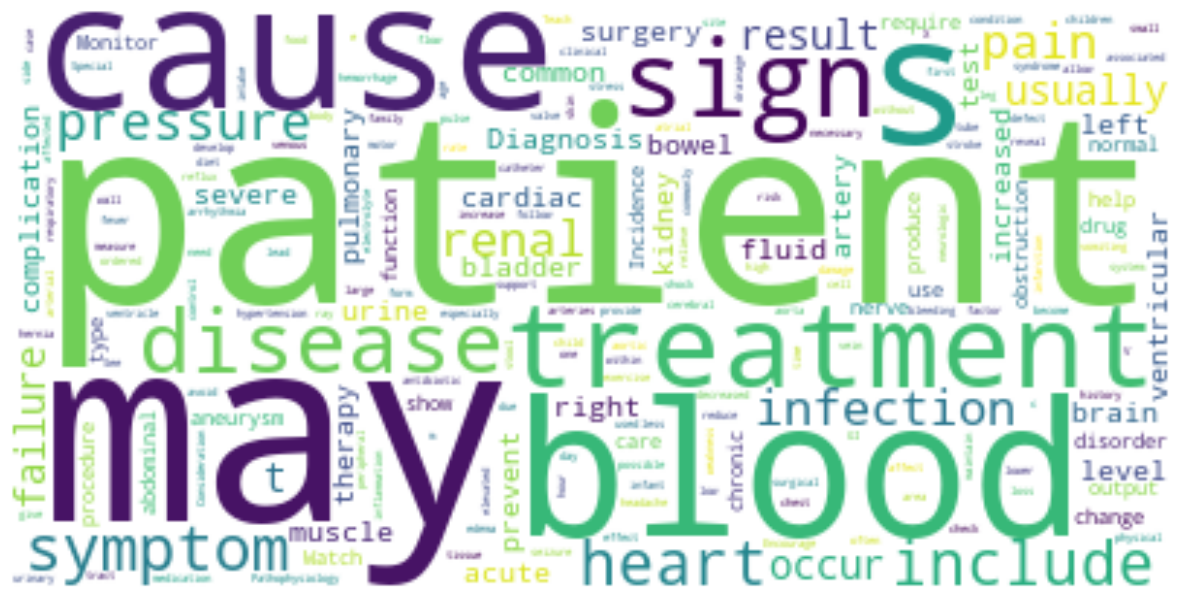

In [14]:
All_text = list(df.string_values)
All_text = " ".join(All_text)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(All_text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

### plot the most common words in the data before perform any data pre-processing

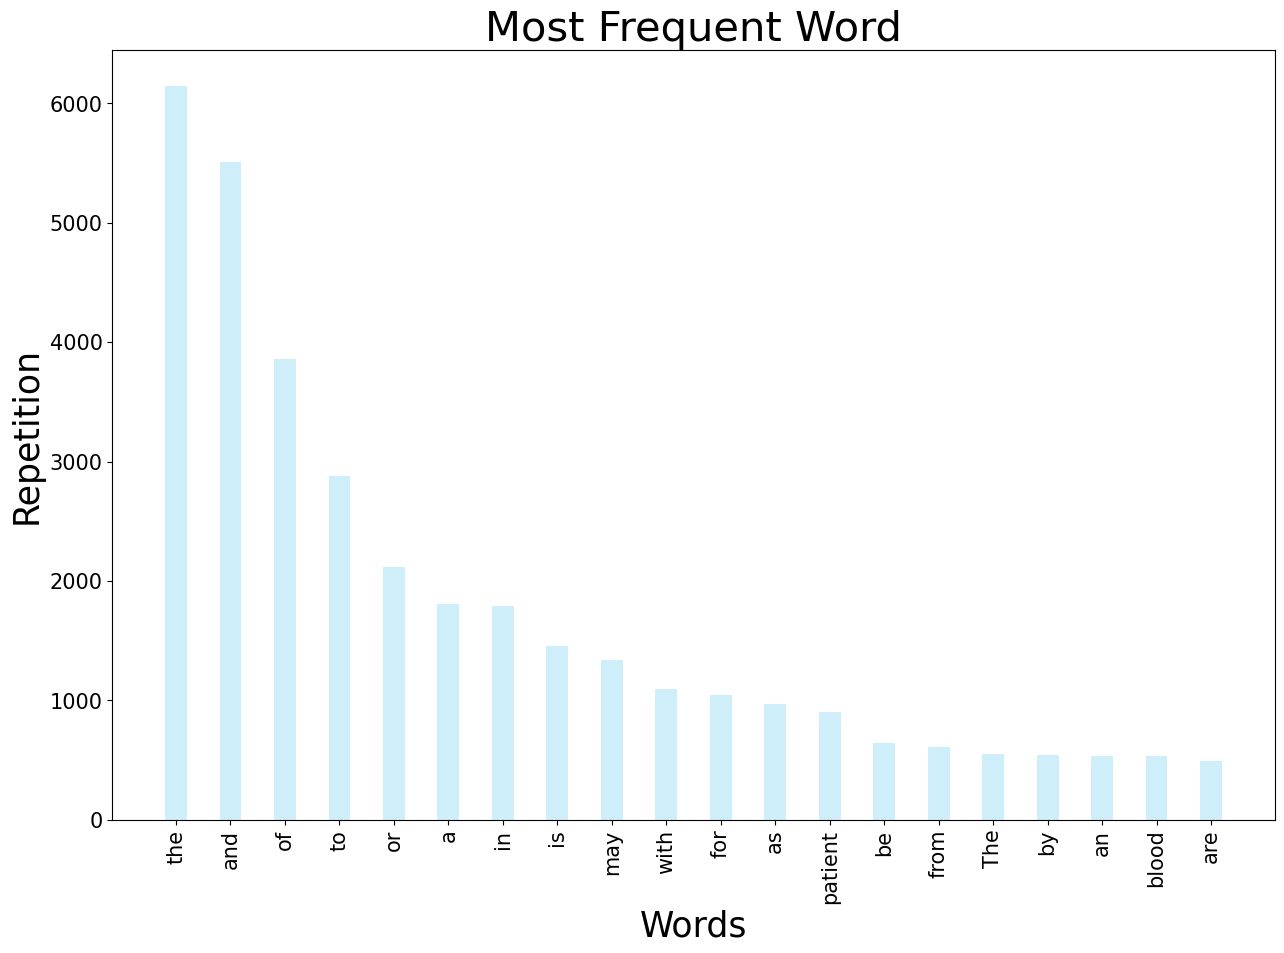

In [16]:
freq_words = get_freq_word(df.string_values)
freq_words.columns = ['WORD', 'COUNT']

plt.figure(figsize=(15,10))
plt.bar(freq_words.WORD[:20], freq_words.COUNT[:20], color ='#ceeffa',
        width = 0.4)
plt.xticks(rotation=90 ,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Words" , fontsize = 25)
plt.ylabel("Repetition", fontsize = 25)
plt.title("Most Frequent Word", fontsize = 30)
plt.show();

# Data Pre-processing:
In this section we will perform the pre-processing techniques that should be done with text

In [18]:
# Import necessary modules
import ssl
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
ssl._create_default_https_context = ssl._create_unverified_context

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Import WordNetLemmatizer, and stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# import spcay framework
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.symbols import amod

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rinku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rinku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rinku\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\rinku\anaconda3\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [20]:
# Tokenize the article: tokens
tokens = word_tokenize(All_text)
# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 10449), ('.', 6930), ('the', 6718), ('and', 5668), ('of', 3868), ('to', 2985), ('or', 2162), ('in', 2136), ('a', 2030), ('(', 1505)]


In [22]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

**Bigram and Trigram Extraction**

In [24]:
from nltk.util import ngrams
from collections import Counter

# Generate bigrams and trigrams
bigrams = list(ngrams(no_stops, 2))
trigrams = list(ngrams(no_stops, 3))

# Count the most common bigrams and trigrams
bigram_counts = Counter(bigrams).most_common(20)
trigram_counts = Counter(trigrams).most_common(20)

# Display the most common bigrams
print("Most common bigrams:")
for bigram, count in bigram_counts:
    print(f"{bigram}: {count}")

# Display the most common trigrams
print("\nMost common trigrams:")
for trigram, count in trigram_counts:
    print(f"{trigram}: {count}")

Most common bigrams:
('heart', 'failure'): 169
('signs', 'symptoms'): 147
('blood', 'pressure'): 136
('may', 'also'): 97
('special', 'considerations'): 97
('blood', 'flow'): 84
('causes', 'incidence'): 71
('patient', 'family'): 70
('may', 'include'): 68
('cardiac', 'output'): 65
('may', 'cause'): 64
('vital', 'signs'): 61
('intake', 'output'): 58
('left', 'ventricular'): 56
('renal', 'failure'): 55
('spinal', 'cord'): 51
('may', 'occur'): 49
('watch', 'signs'): 48
('nausea', 'vomiting'): 48
('may', 'result'): 44

Most common trigrams:
('special', 'considerations', 'patient'): 24
('monitor', 'vital', 'signs'): 20
('considerations', 'patient', 'care'): 18
('chronic', 'renal', 'failure'): 17
('right', 'ventricular', 'hypertrophy'): 15
('diagnosis', 'confirming', 'diagnosis'): 15
('provide', 'emotional', 'support'): 15
('patient', 'care', 'includes'): 15
('patient', 'vital', 'signs'): 14
('treatment', 'may', 'include'): 14
('left', 'sternal', 'border'): 13
('left', 'ventricular', 'hypertro

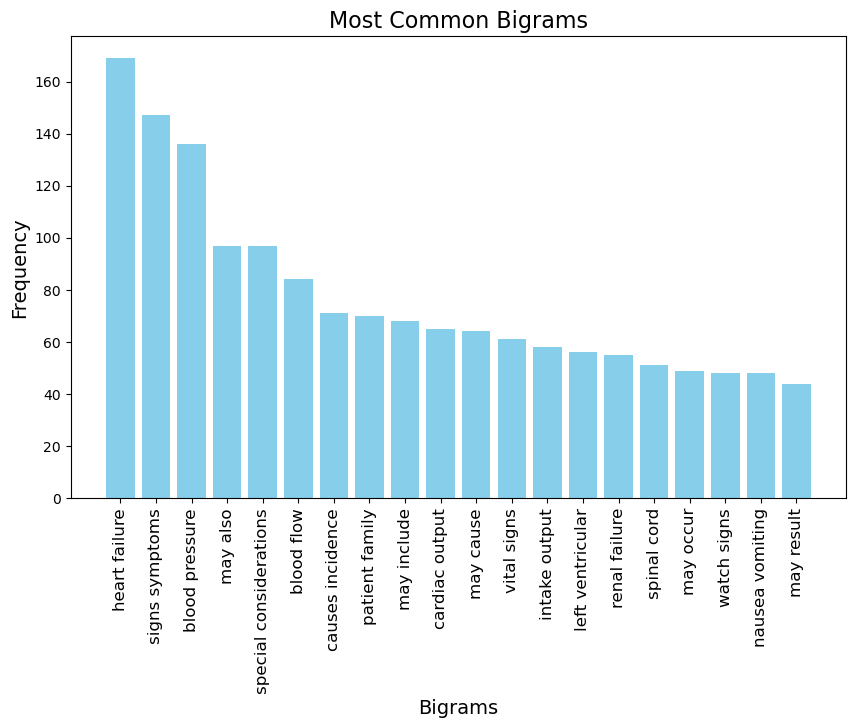

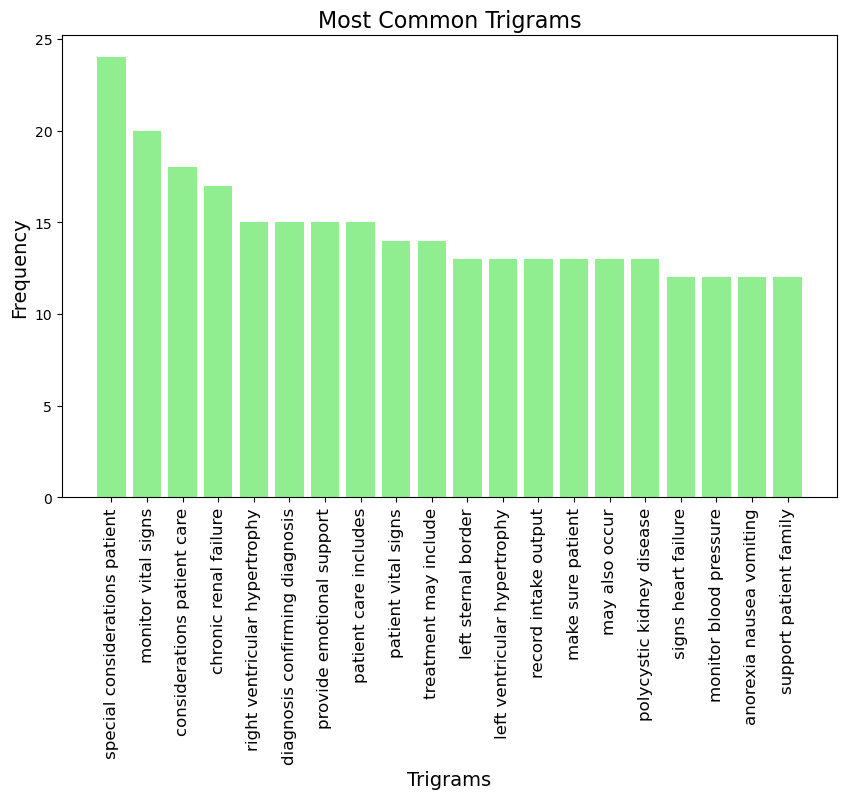

In [26]:
# Convert tuples to strings for visualization
bigram_strings = [' '.join(bigram) for bigram, _ in bigram_counts]
bigram_values = [count for _, count in bigram_counts]

plt.figure(figsize=(10, 6))
plt.bar(bigram_strings, bigram_values, color='skyblue')
plt.xticks(rotation=90, fontsize=12)
plt.title('Most Common Bigrams', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Bigrams', fontsize=14)
plt.show()

trigram_strings = [' '.join(trigram) for trigram, _ in trigram_counts]
trigram_values = [count for _, count in trigram_counts]

plt.figure(figsize=(10, 6))
plt.bar(trigram_strings, trigram_values, color='lightgreen')
plt.xticks(rotation=90, fontsize=12)
plt.title('Most Common Trigrams', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Trigrams', fontsize=14)
plt.show()

In [28]:
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 200 most common tokens
print(bow.most_common(200))

[('patient', 1420), ('may', 1354), ('blood', 597), ('cause', 527), ('treatment', 470), ('sign', 468), ('disease', 461), ('symptom', 450), ('heart', 419), ('pressure', 396), ('infection', 361), ('pain', 354), ('renal', 348), ('include', 338), ('usually', 334), ('also', 312), ('result', 299), ('failure', 275), ('surgery', 263), ('diagnosis', 261), ('fluid', 260), ('complication', 252), ('artery', 246), ('cardiac', 244), ('ventricular', 238), ('prevent', 217), ('acute', 215), ('child', 208), ('common', 205), ('left', 202), ('therapy', 202), ('increased', 201), ('pulmonary', 197), ('severe', 197), ('urine', 190), ('muscle', 188), ('level', 188), ('bladder', 177), ('test', 173), ('brain', 172), ('disorder', 168), ('output', 168), ('show', 168), ('obstruction', 168), ('aneurysm', 167), ('chronic', 166), ('change', 165), ('bowel', 165), ('kidney', 164), ('help', 164), ('occur', 162), ('care', 161), ('drug', 159), ('normal', 156), ('monitor', 156), ('abdominal', 152), ('watch', 151), ('inciden

## Using SpaCy to define adjective words

In [30]:
df['spacy_doc'] = list(nlp.pipe(df.string_values))

In [32]:
doc_adj = [token.text.lower() for doc in df.spacy_doc for token in doc if token.pos_=='ADJ']
doc_noun = [token.text.lower() for doc in df.spacy_doc for token in doc if token.pos_=='NOUN']

In [38]:
df['spacy_doc']

0    ( , 1, Cardiovascular, Disorders, Introduction...
Name: spacy_doc, dtype: object

In [40]:
Counter(doc_adj).most_common(10)

[('such', 455),
 ('other', 315),
 ('renal', 303),
 ('cardiac', 237),
 ('ventricular', 209),
 ('common', 202),
 ('severe', 197),
 ('pulmonary', 183),
 ('abdominal', 166),
 ('acute', 159)]

In [42]:
Counter(doc_noun).most_common(10)

[('patient', 1014),
 ('blood', 595),
 ('heart', 407),
 ('disease', 388),
 ('pressure', 384),
 ('treatment', 380),
 ('signs', 371),
 ('symptoms', 363),
 ('pain', 350),
 ('patients', 287)]

In [44]:
# save the adjective words in list
adj_list = list(set(doc_adj))

In [46]:
print(len(adj_list))

2394


### In the next code cells we will customize the stop-words based on business domain.

***we need to add some words to the stop words bag/list, and these words comes from the business domain.***

In [48]:
# defined stop words in topic domain
  
stop_words = ["patient", "may", "disease", "cause", "treatment", "also", "symptom", "usually", "sign",
                "diagnosis", "result", "pain", "include", "pressure", "lung", "pulmonary", "respiratory",
                "chest", "fluid", "complication", "change", "blood", "infection", "therapy", "prevent",
                "acute", "care", "child", "level", "air", "use", "severe", "help", "used", "exercise",
                "normal", "incidence", "pneumonia","tissue", "show", "chronic", "failure", "cast", "increased",
                "monitor", "hypoxemia", "produce", "edema", "increase", "space", "occurs", "cough", "alveolar", 
                "heart", "pathophysiology", "sputum", "provide", "decreased", "pneumothorax", "test", "special",
                "tube", "condition", "common", "surgery","secretion", "fibrosis", "disorder", "pa", "area", "form",
                "cell", "skin", "drainage", "tb", "year", "commonly", "check", "teach", "rest", "watch", "encourage", 
                "underlying", "consideration", "et", "early", "hour", "family", "need", "effusion", "body", "drug", "support", 
                "rate", "syndrome", "requires", "inflammation", "abg", "side", "infant", "however", "upper", "cor", "pulmonale",
                 "ventilator", "mechanical", "breath", "maintain" , "foot", "day", "bed", "parent", "especially", "fever", "culture",
                'system', 'within', 'factor', 'amount', 'death', 'movement', 'progress', 'volume', 'one', 'stage', 'report',
                'avoid', 'respiration', 'trauma', 'occur', 'atelectasis', 'hand', 'includes', 'weight', 'tendon', 'hypertension', 
                'le', 'time', 'lead', 'damage', 'causing', 'require', 'activity', 'injury', 'risk', 'mm', 'measure', 'examination',
                'nerve', 'stress', 'make', 'al', 'see', 'decrease', 'age', 'hg''case', 'month', 'coughing', 'develops', 'formation', 
                'without', 'site', 'every', 'reduce', 'relieve', 'effect','percussion', 'ordered', 'develop', 'affect', 'loss', 'flow',
                'lesion', 'technique', 'exposure', 'gas', 'finding', 'procedure', 'begin', 'wall', 'immediately', 'type', 'response', 
                'position', 'needed', 'administer', 'control', 'ass', 'increasing', 'although', 'tell', 'output', 'give', 'analysis',
                'history', 'often' ,'week', 'home', 'perform','function', 'typically', 'frequently', 'adult', 'indicate', 'administration',
                'explain', 'using', 'suggest', 'called', 'center', 'head', 'people', 'resulting', 'including', 'period', 'feature'
                   ]

In [50]:
# merge (adjective & topic domain stop words) list
new_stopwords = adj_list+stop_words

In [52]:
stpwrd = stopwords.words('english')

In [54]:
print(f' adjective words = {len(adj_list)}')
print(f' topic domain stop words = {len(stop_words)}')
print(f' merge adj_list & stop_words =  {len(new_stopwords)}')
print(f' english stop words = {len(stpwrd)}')

 adjective words = 2394
 topic domain stop words = 216
 merge adj_list & stop_words =  2610
 english stop words = 179


In [56]:
stpwrd.extend(new_stopwords)

print(f'after merge all of the stop words = {len(stpwrd)}')

after merge all of the stop words = 2789


In [60]:
# Remove all stop words: no_stops
no_stops01 = [t for t in lemmatized if t not in stpwrd ]


# Create the bag-of-words: bow
bow = Counter(no_stops01)

# Print the 100 most common tokens
print(bow.most_common(100))

[('artery', 246), ('muscle', 188), ('bladder', 177), ('brain', 172), ('obstruction', 168), ('aneurysm', 167), ('kidney', 164), ('valve', 125), ('seizure', 122), ('defect', 113), ('bleeding', 111), ('medication', 109), ('intake', 108), ('vomiting', 106), ('hernia', 103), ('arrhythmia', 101), ('food', 101), ('motor', 99), ('case', 98), ('ventricle', 97), ('hemorrhage', 96), ('headache', 95), ('diet', 95), ('shock', 91), ('tract', 89), ('gi', 86), ('stroke', 85), ('weakness', 84), ('aorta', 83), ('calculus', 82), ('c', 81), ('leg', 80), ('vessel', 78), ('stool', 77), ('page', 74), ('onset', 74), ('ulcer', 74), ('infarction', 73), ('caused', 70), ('dysfunction', 69), ('encephalitis', 68), ('dialysis', 67), ('rupture', 65), ('cord', 65), ('protein', 64), ('nausea', 64), ('mouth', 64), ('sodium', 63), ('ischemia', 62), ('abnormality', 61), ('status', 60), ('two', 59), ('diverticulum', 59), ('oxygen', 58), ('virus', 58), ('men', 58), ('stomach', 58), ('carefully', 57), ('catheterization', 57)

### Plot word cloud after pre-processing

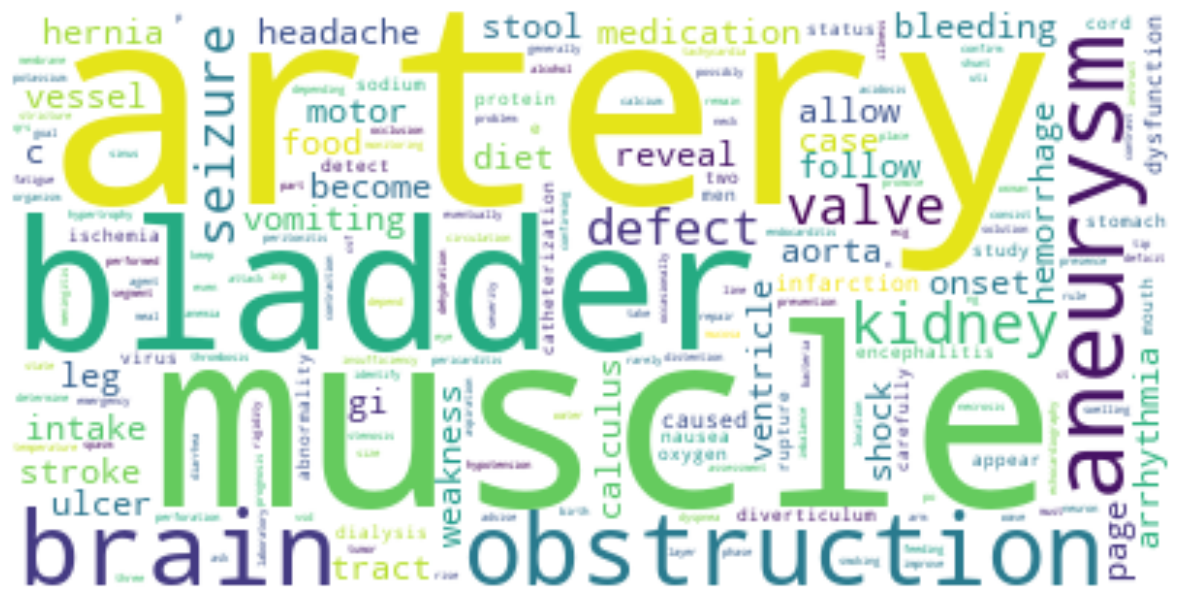

In [62]:
All_text = " ".join(no_stops01)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(All_text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

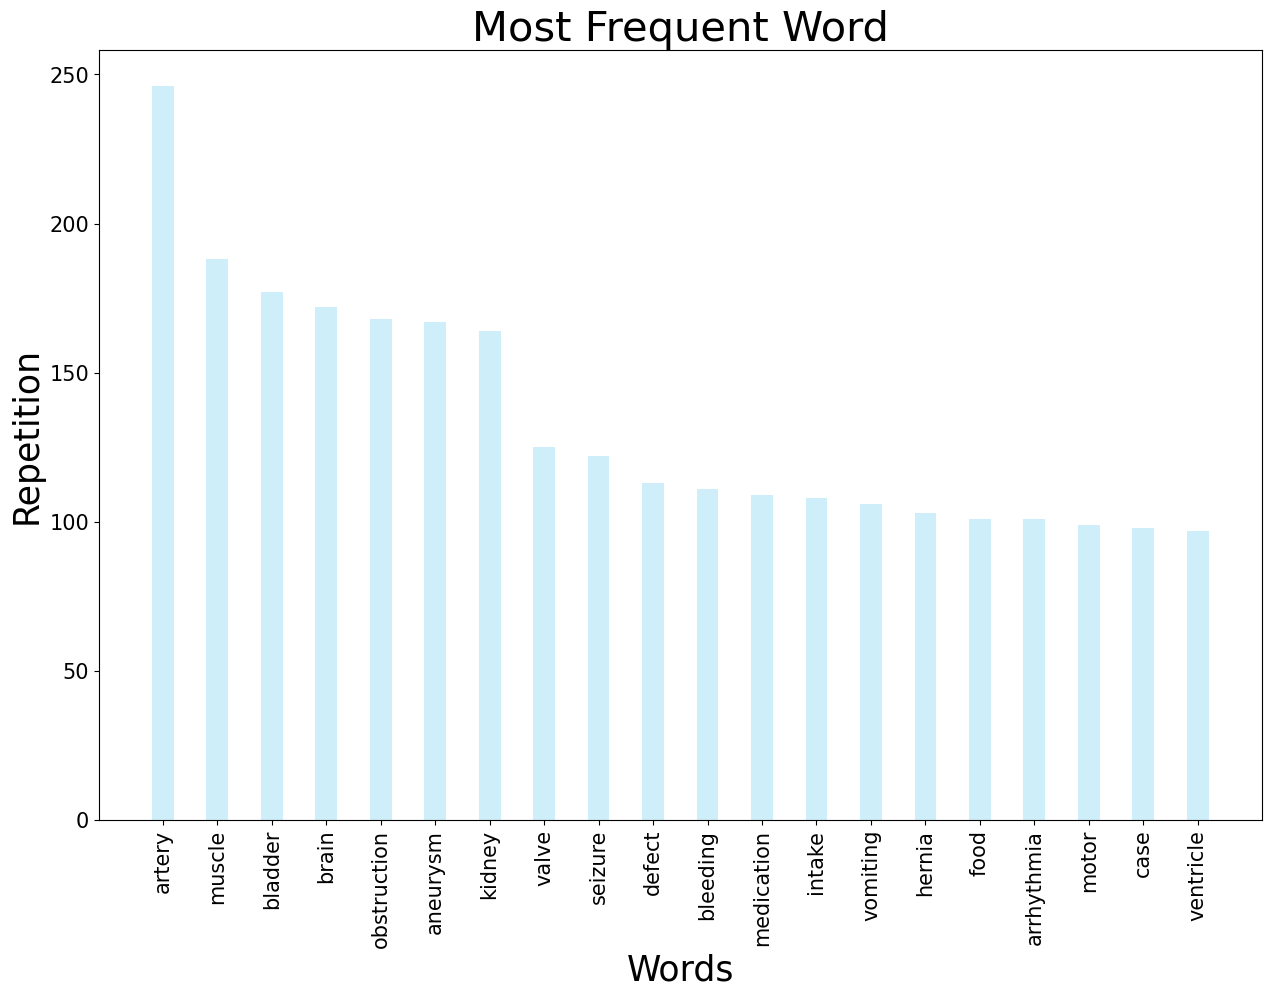

In [64]:
freq_words = get_freq_word(no_stops01)
freq_words.columns = ['WORD', 'COUNT']

plt.figure(figsize=(15,10))
plt.bar(freq_words.WORD[:20], freq_words.COUNT[:20], color ='#ceeffa',
        width = 0.4)
plt.xticks(rotation=90 ,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Words" , fontsize = 25)
plt.ylabel("Repetition", fontsize = 25)
plt.title("Most Frequent Word", fontsize = 30)
plt.show();

### Save dataframe into csv file format

In [66]:
corpus = " ".join(no_stops01)
string = corpus
df01 = pd.DataFrame([string], columns=['string_values'])

In [68]:
df01.to_csv('allchapters.csv', index=False)

In [76]:
# save stop words list in pickle file, to use it later
import pickle
with open('stop_words.ob', 'wb') as fp:
    pickle.dump(stpwrd, fp)

with open('adjectives.ob', 'wb') as fp:
    pickle.dump(adj_list, fp)